### Importing libraries and data file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exploratory Data Analysis

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


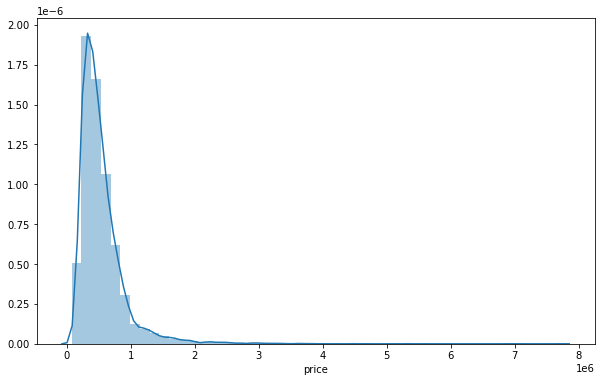

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(df['price']);

Our target distribution is right skewed with some outliers after 200k. We might want to eliminate these later on while training the model as not many house have this price range

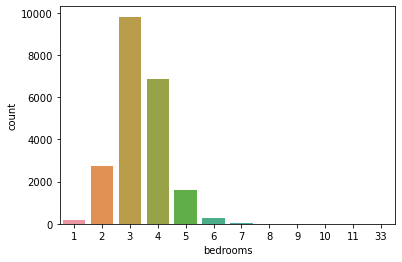

In [6]:
sns.countplot(df['bedrooms']);

Majority number of bedrooms fall between 2 to 5. We have some outlier values after 6 bedrooms. We can clear these entries for better model training

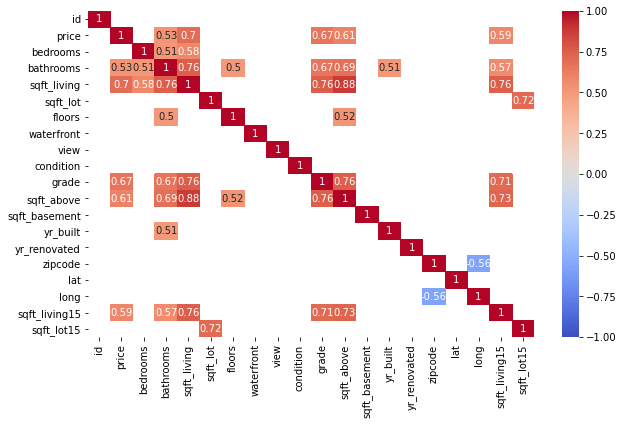

In [7]:
corr = df.corr()
corr_filter = corr.where(lambda x: (x>0.5) | (x<(-0.5))) #filtering strong correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_filter,cmap='coolwarm',vmin=-1,vmax=1,annot=True);

- Price is positively correlated to sqft_living, grade, bathrooms, sqtf_above, sqft_living15 
- Sqft_living is in turn highly correlated with areas of bedrooms, bathrooms, interior housing space (above sea level) and grade

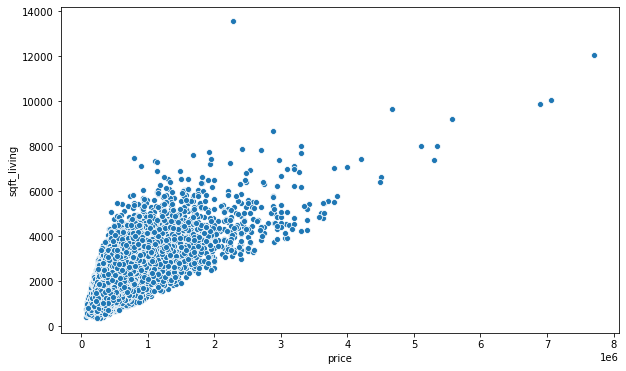

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df);

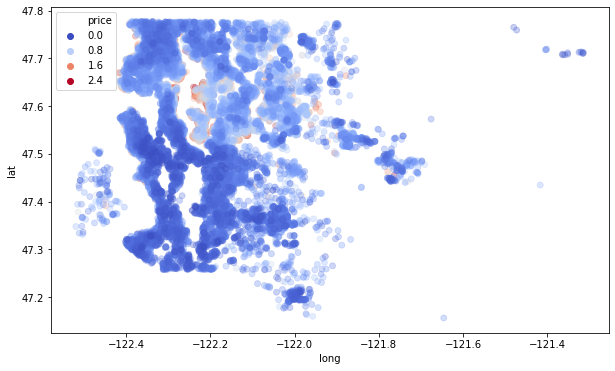

In [9]:
cleandf = df.sort_values(by='price',ascending=False).iloc[round(len(df)*(0.01)):] #cleaning top 1% outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=cleandf,hue='price',palette='coolwarm',edgecolor=None,alpha=0.3);

The above graph shows us the expensive houses are situated between latitude 47.5 and 47.7 corresponding to longitude of -122.2 and -122.0 (this area is waterfront). Thus we are simply able to get this insight without any geographical plotting

### Feature Selection and Engineering

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

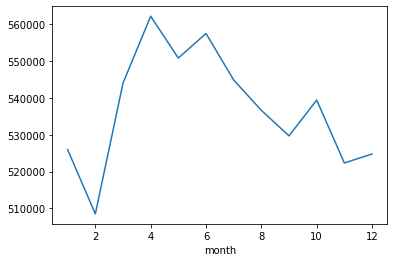

In [12]:
df.groupby(by='month').mean()['price'].plot();

The above graph shows us that the average sale price for a house is higher during summers i.e. between April to June

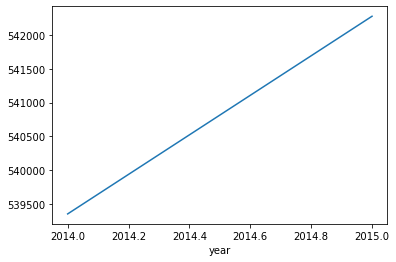

In [13]:
df.groupby(by='year').mean()['price'].plot();

The prices have gradually increase each year with a constant proportional incremental growth

In [14]:
#Let us keep these 2 new columns and drop the actual date column
df.drop('date',axis=1,inplace=True)

In [15]:
#Converting zipcode to a string variable 
df['zipcode'] = df['zipcode'].astype('str')
print(df['zipcode'].nunique())
#Since we have way too many zipcodes, for this implementation let us drop this column
df.drop('zipcode',axis=1,inplace=True)

70


### Scaling and Train-Val Split

In [16]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Building and training the model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(units=19,activation='relu')) #Since we have 19 input vars, we use those many units
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=1)) #final output node for target variable
model.compile(optimizer='adam',loss='mse')

In [21]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
         batch_size=128, #batch size is used to pass only chunks of the training data to the model (similar to cv)
         epochs=600) 

Epoch 1/600
119/119 [==============================] - 0s 4ms/step - loss: 430227980288.0000 - val_loss: 418841985024.0000
Epoch 2/600
119/119 [==============================] - 0s 3ms/step - loss: 428255576064.0000 - val_loss: 412129132544.0000
Epoch 3/600
119/119 [==============================] - 0s 3ms/step - loss: 402598494208.0000 - val_loss: 355476439040.0000
Epoch 4/600
119/119 [==============================] - 0s 2ms/step - loss: 292186914816.0000 - val_loss: 194915844096.0000
Epoch 5/600
119/119 [==============================] - 0s 2ms/step - loss: 138243244032.0000 - val_loss: 98222735360.0000
Epoch 6/600
119/119 [==============================] - 0s 2ms/step - loss: 98409373696.0000 - val_loss: 93823410176.0000
Epoch 7/600
119/119 [==============================] - 0s 2ms/step - loss: 96004366336.0000 - val_loss: 92185632768.0000
Epoch 8/600
119/119 [==============================] - 0s 2ms/step - loss: 94237556736.0000 - val_loss: 90447118336.0000
Epoch 9/600
119/119 [==

119/119 [==============================] - 0s 2ms/step - loss: 35967107072.0000 - val_loss: 34622533632.0000
Epoch 69/600
119/119 [==============================] - 0s 2ms/step - loss: 35785474048.0000 - val_loss: 34481188864.0000
Epoch 70/600
119/119 [==============================] - 0s 2ms/step - loss: 35677028352.0000 - val_loss: 34300162048.0000
Epoch 71/600
119/119 [==============================] - 0s 2ms/step - loss: 35523198976.0000 - val_loss: 34186926080.0000
Epoch 72/600
119/119 [==============================] - 0s 2ms/step - loss: 35402297344.0000 - val_loss: 34084100096.0000
Epoch 73/600
119/119 [==============================] - 0s 2ms/step - loss: 35305664512.0000 - val_loss: 33976182784.0000
Epoch 74/600
119/119 [==============================] - 0s 2ms/step - loss: 35154374656.0000 - val_loss: 33883136000.0000
Epoch 75/600
119/119 [==============================] - 0s 2ms/step - loss: 35032223744.0000 - val_loss: 33810864128.0000
Epoch 76/600
119/119 [===============

Epoch 135/600
119/119 [==============================] - 0s 2ms/step - loss: 32462997504.0000 - val_loss: 30878060544.0000
Epoch 136/600
119/119 [==============================] - 0s 2ms/step - loss: 32371279872.0000 - val_loss: 30837776384.0000
Epoch 137/600
119/119 [==============================] - 0s 2ms/step - loss: 32348639232.0000 - val_loss: 30818078720.0000
Epoch 138/600
119/119 [==============================] - 0s 2ms/step - loss: 32320487424.0000 - val_loss: 30785533952.0000
Epoch 139/600
119/119 [==============================] - 0s 2ms/step - loss: 32292704256.0000 - val_loss: 30839326720.0000
Epoch 140/600
119/119 [==============================] - 0s 2ms/step - loss: 32273184768.0000 - val_loss: 30712285184.0000
Epoch 141/600
119/119 [==============================] - 0s 2ms/step - loss: 32255412224.0000 - val_loss: 30741020672.0000
Epoch 142/600
119/119 [==============================] - 0s 2ms/step - loss: 32229928960.0000 - val_loss: 30668691456.0000
Epoch 143/600
11

119/119 [==============================] - 0s 2ms/step - loss: 31174412288.0000 - val_loss: 29385326592.0000
Epoch 202/600
119/119 [==============================] - 0s 2ms/step - loss: 31185250304.0000 - val_loss: 29341986816.0000
Epoch 203/600
119/119 [==============================] - 0s 2ms/step - loss: 31130695680.0000 - val_loss: 29429032960.0000
Epoch 204/600
119/119 [==============================] - 0s 2ms/step - loss: 31137208320.0000 - val_loss: 29304387584.0000
Epoch 205/600
119/119 [==============================] - 0s 2ms/step - loss: 31150039040.0000 - val_loss: 29314369536.0000
Epoch 206/600
119/119 [==============================] - 0s 2ms/step - loss: 31159842816.0000 - val_loss: 29301809152.0000
Epoch 207/600
119/119 [==============================] - 0s 2ms/step - loss: 31120412672.0000 - val_loss: 29350404096.0000
Epoch 208/600
119/119 [==============================] - 0s 2ms/step - loss: 31119661056.0000 - val_loss: 29272989696.0000
Epoch 209/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30483148800.0000 - val_loss: 28457410560.0000
Epoch 268/600
119/119 [==============================] - 0s 2ms/step - loss: 30461040640.0000 - val_loss: 28441899008.0000
Epoch 269/600
119/119 [==============================] - 0s 2ms/step - loss: 30495594496.0000 - val_loss: 28426657792.0000
Epoch 270/600
119/119 [==============================] - 0s 2ms/step - loss: 30435543040.0000 - val_loss: 28422436864.0000
Epoch 271/600
119/119 [==============================] - 0s 2ms/step - loss: 30459123712.0000 - val_loss: 28467171328.0000
Epoch 272/600
119/119 [==============================] - 0s 2ms/step - loss: 30429960192.0000 - val_loss: 28540573696.0000
Epoch 273/600
119/119 [==============================] - 0s 2ms/step - loss: 30440214528.0000 - val_loss: 28441778176.0000
Epoch 274/600
119/119 [==============================] - 0s 2ms/step - loss: 30447550464.0000 - val_loss: 28370401280.0000
Epoch 275/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30008334336.0000 - val_loss: 27762188288.0000
Epoch 334/600
119/119 [==============================] - 0s 2ms/step - loss: 29920436224.0000 - val_loss: 27708123136.0000
Epoch 335/600
119/119 [==============================] - 0s 2ms/step - loss: 29870393344.0000 - val_loss: 27597551616.0000
Epoch 336/600
119/119 [==============================] - 0s 2ms/step - loss: 29868556288.0000 - val_loss: 27588679680.0000
Epoch 337/600
119/119 [==============================] - 0s 2ms/step - loss: 29890461696.0000 - val_loss: 27573264384.0000
Epoch 338/600
119/119 [==============================] - 0s 2ms/step - loss: 29862135808.0000 - val_loss: 27595753472.0000
Epoch 339/600
119/119 [==============================] - 0s 2ms/step - loss: 29880442880.0000 - val_loss: 27527913472.0000
Epoch 340/600
119/119 [==============================] - 0s 2ms/step - loss: 29837395968.0000 - val_loss: 27638820864.0000
Epoch 341/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29305632768.0000 - val_loss: 26925340672.0000
Epoch 400/600
119/119 [==============================] - 0s 2ms/step - loss: 29306703872.0000 - val_loss: 26829598720.0000
Epoch 401/600
119/119 [==============================] - 0s 2ms/step - loss: 29192056832.0000 - val_loss: 26995994624.0000
Epoch 402/600
119/119 [==============================] - 0s 2ms/step - loss: 29265668096.0000 - val_loss: 26821996544.0000
Epoch 403/600
119/119 [==============================] - 0s 2ms/step - loss: 29232961536.0000 - val_loss: 26797871104.0000
Epoch 404/600
119/119 [==============================] - 0s 2ms/step - loss: 29222707200.0000 - val_loss: 26783711232.0000
Epoch 405/600
119/119 [==============================] - 0s 2ms/step - loss: 29262837760.0000 - val_loss: 26786342912.0000
Epoch 406/600
119/119 [==============================] - 0s 2ms/step - loss: 29207848960.0000 - val_loss: 26858686464.0000
Epoch 407/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28545103872.0000 - val_loss: 26029690880.0000
Epoch 466/600
119/119 [==============================] - 0s 2ms/step - loss: 28534896640.0000 - val_loss: 26008088576.0000
Epoch 467/600
119/119 [==============================] - 0s 2ms/step - loss: 28533510144.0000 - val_loss: 26170699776.0000
Epoch 468/600
119/119 [==============================] - 0s 2ms/step - loss: 28500410368.0000 - val_loss: 25932064768.0000
Epoch 469/600
119/119 [==============================] - 0s 2ms/step - loss: 28458160128.0000 - val_loss: 25963350016.0000
Epoch 470/600
119/119 [==============================] - 0s 2ms/step - loss: 28521449472.0000 - val_loss: 25904992256.0000
Epoch 471/600
119/119 [==============================] - 0s 2ms/step - loss: 28387268608.0000 - val_loss: 25843916800.0000
Epoch 472/600
119/119 [==============================] - 0s 2ms/step - loss: 28434087936.0000 - val_loss: 25825193984.0000
Epoch 473/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 27013994496.0000 - val_loss: 24461815808.0000
Epoch 532/600
119/119 [==============================] - 0s 2ms/step - loss: 26980837376.0000 - val_loss: 24363927552.0000
Epoch 533/600
119/119 [==============================] - 0s 2ms/step - loss: 26933776384.0000 - val_loss: 24450508800.0000
Epoch 534/600
119/119 [==============================] - 0s 2ms/step - loss: 26974398464.0000 - val_loss: 24321394688.0000
Epoch 535/600
119/119 [==============================] - 0s 2ms/step - loss: 26871435264.0000 - val_loss: 24324864000.0000
Epoch 536/600
119/119 [==============================] - 0s 2ms/step - loss: 26795329536.0000 - val_loss: 24461250560.0000
Epoch 537/600
119/119 [==============================] - 0s 2ms/step - loss: 26827872256.0000 - val_loss: 24237361152.0000
Epoch 538/600
119/119 [==============================] - 0s 2ms/step - loss: 26793193472.0000 - val_loss: 24185466880.0000
Epoch 539/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 24286459904.0000 - val_loss: 21939038208.0000
Epoch 598/600
119/119 [==============================] - 0s 2ms/step - loss: 24182130688.0000 - val_loss: 21870053376.0000
Epoch 599/600
119/119 [==============================] - 0s 2ms/step - loss: 24161679360.0000 - val_loss: 21757110272.0000
Epoch 600/600
119/119 [==============================] - 0s 2ms/step - loss: 24113721344.0000 - val_loss: 21724803072.0000


<AxesSubplot:>

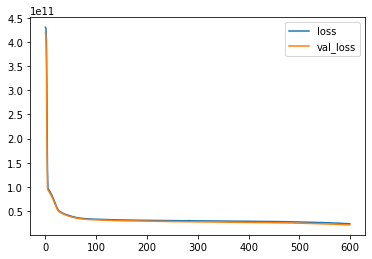

In [22]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Since our loss and val_loss continue to decline simultaneously, we are certain that we have not done over-fitting of the data. To improve our model in the future, we can select higher epochs as well.

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
y_valpred = model.predict(X_val)
print('MSE',mean_squared_error(y_val,y_valpred))
print('RMSE',np.sqrt(mean_squared_error(y_val,y_valpred)))
print('MAE',mean_absolute_error(y_val,y_valpred))
print('Explained var score',explained_variance_score(y_val,y_valpred))

MSE 21724804524.08621
RMSE 147393.3666217249
MAE 88802.67762827931
Explained var score 0.8361835496601632


We have a decent model with an explained variance of 0.8147 with a mean absolute error of 98055 dollars

In [24]:
y_valpred = np.ravel(y_valpred)

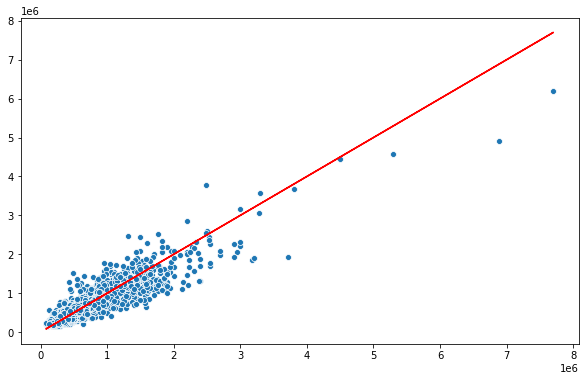

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(y_val,y_valpred)
plt.plot(y_val,y_val,'r')

Our model is able to predict the prices of lower priced houses whereas it fails to predict the price of top high priced houses (which can be treated as outliers to retrain the model) 

**Note:** This project was done as a follow-along of the course - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/